# **`Analysis of Sex-Based Differences in Age of Cardiovascular Disease Patients`**

#### STAT 201 Group Project Proposal ####
##### Group 17 - *Janice Chan, Ena Gupta, Gael Hernandez Palmer*

### Introduction

As it currently stands, cardiovascular disease (CVD) is the second leading cause of death for Canadians (Statistics Canada, 2022). Over years of study, scientists have been able to identify and track certain risk factors for CVD in order to better inform prevention and mitigation efforts. Sex-based differences in both the prevalence and clinical presentation of CVDs have long been a topic of interest, with men being afflicted by the disease both more frequently and earlier in their lives (P.H.A of Canada, 2017). The male-focused lens in studying CVDs has historically meant considerable rates of underdiagnosis for women and a misunderstanding of the differences in presentation of disease. 

In this project, our aim is to use compiled data to measure and quantify the difference in mean age between men and women suffering from CVD and their respective standard deviations. To achieve this we will be using the “Heart Disease Data Set” published on the UCI Machine Learning Repository by David Aha. We have selected the Cleveland Clinic database as opposed to the European databases to obtain results that can be generalized to the greater Canadian public based on similar lifestyle and socio-economic distributions between the United States and Canada (Solé-Auro et al., 2017). Our initial report will focus on obtaining summary statistics and visualizations that can help us perform a well-informed analysis using inferential tools as a guide.  

### Dataset:

https://archive.ics.uci.edu/ml/datasets/Heart+Disease

By: David W. Aha

### Preliminary Results

In [15]:
# Load packages
library(digest)
library(infer)
library(repr)
library(tidyverse)
library(dplyr)
library(ggplot2)

In [16]:
# set seed for reproducibility
set.seed(1234)

# HEART DISEASE DATA (Compiled)
# load data

heart_disease_data <- read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", 
                                 delim = ",",
                                 col_names = FALSE) %>%
    transmute(age = X1, # clean data; renaming
              
              sex = factor(X2) %>%
                  fct_recode(female = "0", # binary -> factors
                             male = "1"),
              
              chest_pain = factor(X3) %>% # Type of chest pain reported
                  fct_recode(typical_angina = "1", # numerical -> factors
                             atypical_angina = "2",
                             nonanginal_pain = "3",
                             asymptomatic = "4"),
              
              resting_bp = X4, # Resting blood pressure (mm/Hg)
              
              cholesterol = X5, # Total cholesterol (mg/dL)
              
              bldsg_over120 = factor(X6) %>% # Indicates wether the patient's blood sugar is over 120 mg/dL
                  fct_recode(no = "0", # binary -> factors
                             yes = "1"),
              
              rest_ecg = factor(X7) %>% # Resting ECG results
                  fct_recode(normal = "0", # numerical -> factors
                             stt_abnormal = "1", 
                             lv_hyptroph = "2"),
              
              max_hr = X8, # Maximum observed heart rate
              
              ex_angina = factor(X9) %>% # Presence of exercise induced angina
                  fct_recode(no = "0", # binary -> factors
                             yes = "1"),
              
              old_peak = X10, # ST depression induced by exercise relative to rest
              
              slope = factor(X11) %>% # Slope of peak exercise ST segment
                  fct_recode(upslope = "1", # numerical -> factors
                             flat = "2",
                             downslope = "3"),
              
              flr_ves = X12, # Number of vessels coloured by fluoroscopy
              
              thalassemia = factor(X13) %>% 
                  fct_recode(normal = "3.0", # numerical -> factors
                             fxd_def = "6.0",
                             rev_def = "7.0"),
              
              disease = factor(X14) %>% # Disease progression
                 fct_recode(no = "0", # numerical -> factors
                            yes = "1",
                            yes = "2", # 1-4 indicate disease progression 
                            yes = "3", # for our analysis we only care about absence/presence of disease
                            yes = "4")) 

## **NOTE**: 
## Code refactoring was done based on provided attribute information which can be accessed at:
## https://raw.githubusercontent.com/Gaelhpalmer/STAT201Project/main/desc.names
              
head(heart_disease_data)

# Heart disease data for male patients
male_diseased = heart_disease_data %>%
    filter(sex == "male",
           disease == "yes") %>% # filter for those diagnosed with heart disease
    select(age, sex, disease) # select relevant attributes

print("Diseased Males")
head(male_diseased)

# Heart disease data for female patients
female_diseased = heart_disease_data %>%
    filter(sex == "female",
           disease == "yes") %>% # filter for those diagnosed with heart disease
    select(age, sex, disease) # select relevant attributes

print("Diseased Females")
head(female_diseased)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,chest_pain,resting_bp,cholesterol,bldsg_over120,rest_ecg,max_hr,ex_angina,old_peak,slope,flr_ves,thalassemia,disease
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<chr>,<fct>,<fct>
63,male,typical_angina,145,233,yes,lv_hyptroph,150,no,2.3,downslope,0.0,fxd_def,no
67,male,asymptomatic,160,286,no,lv_hyptroph,108,yes,1.5,flat,3.0,normal,yes
67,male,asymptomatic,120,229,no,lv_hyptroph,129,yes,2.6,flat,2.0,rev_def,yes
37,male,nonanginal_pain,130,250,no,normal,187,no,3.5,downslope,0.0,normal,no
41,female,atypical_angina,130,204,no,lv_hyptroph,172,no,1.4,upslope,0.0,normal,no
56,male,atypical_angina,120,236,no,normal,178,no,0.8,upslope,0.0,normal,no


[1] "Diseased Males"


age,sex,disease
<dbl>,<fct>,<fct>
67,male,yes
67,male,yes
63,male,yes
53,male,yes
56,male,yes
48,male,yes


[1] "Diseased Females"


age,sex,disease
<dbl>,<fct>,<fct>
62,female,yes
65,female,yes
61,female,yes
51,female,yes
62,female,yes
60,female,yes


In [17]:
# summarize data (estimates)

# Average age in male patients
mean_age_male = mean(male_diseased$age) %>%
    round(digits = 2)



# Standard deviation of age in male patients
sd_age_male = sd(male_diseased$age) %>%
    round(digits = 2)


# Average age in female patients
mean_age_female = mean(female_diseased$age) %>%
    round(digits = 2)


# Standard deviation of age in female patients
sd_age_female = sd(female_diseased$age) %>%
    round(digits = 2)


#### Average age of heart disease patients:
| Male patients      | Female patients |
| ----------- | ----------- |
| 56.09      | 59.08       |

#### Standard deviation of age in heart disease patients:
| Male patients      | Female patients |
| ----------- | ----------- |
| 8.39     | 4.86       |

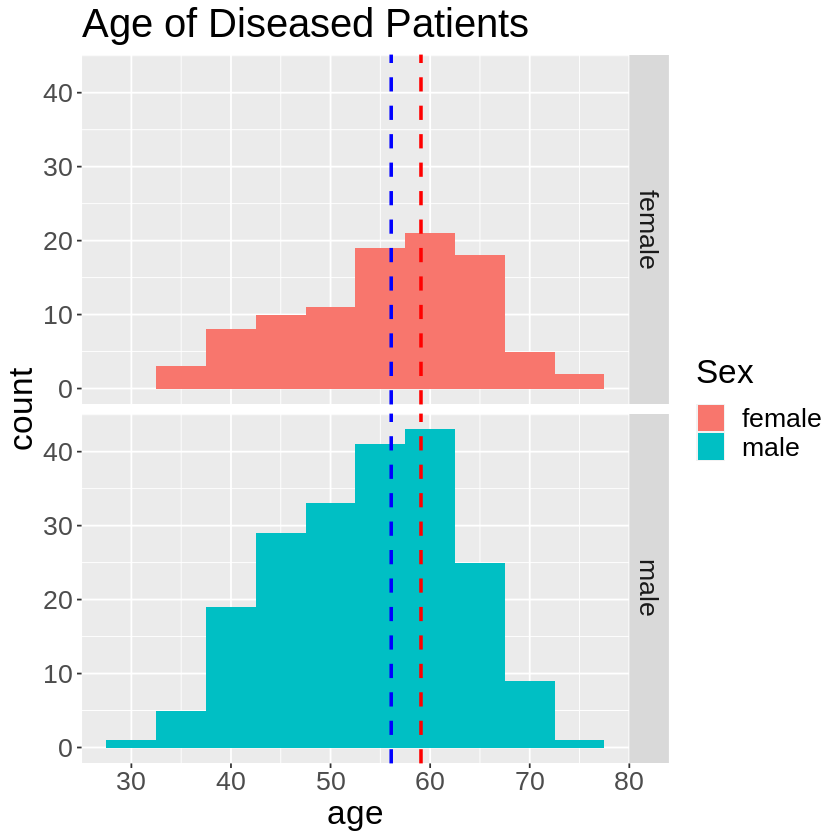

In [18]:
# plot raw data

# Both male and female patients
age_plot <- heart_disease_data %>%
    ggplot(aes(x = age, fill = sex)) +
    geom_histogram(binwidth = 5) +
    facet_grid(rows = vars(sex)) +
    geom_vline(xintercept = mean_age_male, linetype = "dashed", size = 1, color = "blue") +
    geom_vline(xintercept = mean_age_female, linetype = "dashed", size = 1, color = "red") +
    labs(title = "Age of Diseased Patients",
         xlab = "Age",
         fill = "Sex") +
    theme(text = element_text(size = 20))

age_plot

### Methods

Based on preliminary findings of our estimates and histogram, we can already see a difference in average age between both sexes which supports our previous research.

The histogram and estimates we produced above display the mean ages for male and female patients from the data respectively. However, our data set only encompasses cardiovascular disease patients from the data, which is a relatively small sample of patients. We can also see a notable difference in sample size in male and female patients. With this sample from the data, we can perform the bootstrap method to get a more precise average age of male and female patients with a larger sample size, as our population parameter is the mean ages of male and female patients. We will also look at the standard deviation for each sex to quantify the variability in their ages. To answer our research question, we will perform a one-sided hypothesis test; calculating the p-value from our bootstrap sample. We will also calculate the confidence intervals to get a likely range of our population means. This will help us find a  better estimate of our population. 

Based on previous studies and preliminary analysis of the data, we expect to find a statistically significant difference in the mean age of men and women suffering from CVDs, with the age of men being lower than that of women (Mosca et al., 2011). It is our hope that understanding the average age of men and women suffering from CVDs and standard deviation will contribute to more informed diagnoses for patients. Moreover, these findings, along with further research into female-specific risk factors and disease mitigation, could help shape clinical practice and improve disease outcomes for women.

### References

Mosca, L., Barrett-Connor, E., & Wenger, N. K. (2011). Sex/gender differences in cardiovascular disease prevention: What a difference a decade makes. Circulation, 124(19), 2145–2154. https://doi.org/10.1161/CIRCULATIONAHA.110.968792

Public Health Agency (P.H.A) of Canada. (2017, February 10). Heart Disease in Canada. Canada.ca. Retrieved July 26, 2022, from https://www.canada.ca/en/public-health/services/publications/diseases-conditions/heart-disease-canada.html

Solé-Auró, A., Michaud, P.-C., Hurd, M., & Crimmins, E. (2015). Disease Incidence and Mortality Among Older Americans and Europeans. Demography, 52(2), 593–611. https://doi.org/10.1007/s13524-015-0372-7

Statistics Canada. (2022). Leading causes of death, total population, by age group [Data set]. Government of Canada. https://doi.org/10.25318/1310039401-ENG